In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import pycountry
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(15,15)})

In [6]:
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE# create a column for code 

In [7]:
df = pd.read_csv('Datasets/all_diseases.csv.gz', parse_dates=['date'])

In [8]:
df['iso_code']=alpha3code(df.country)

In [26]:
malaria = df[df.disease.isin(['malaria'])]
malaria = malaria.sort_values(by=['country','year'])

covid19 = df[df.disease.isin(['covid-19'])]
covid19 = covid19.sort_values(by=['country','year'])

zika = df[df.disease.isin(['zika'])]
zika = zika.sort_values(by=['country','year'])

dengue = df[df.disease.isin(['dengue'])]
dengue = dengue.sort_values(by=['country','year'])

In [10]:
cases_per_year = pd.concat([
    df[~df.disease.isin(['malaria'])].groupby(['disease','year']).no_cases.sum().to_frame('yearly_cases').reset_index(),
    malaria.groupby(['year','disease']).cumulative_cases.sum().to_frame('yearly_cases').reset_index()
])

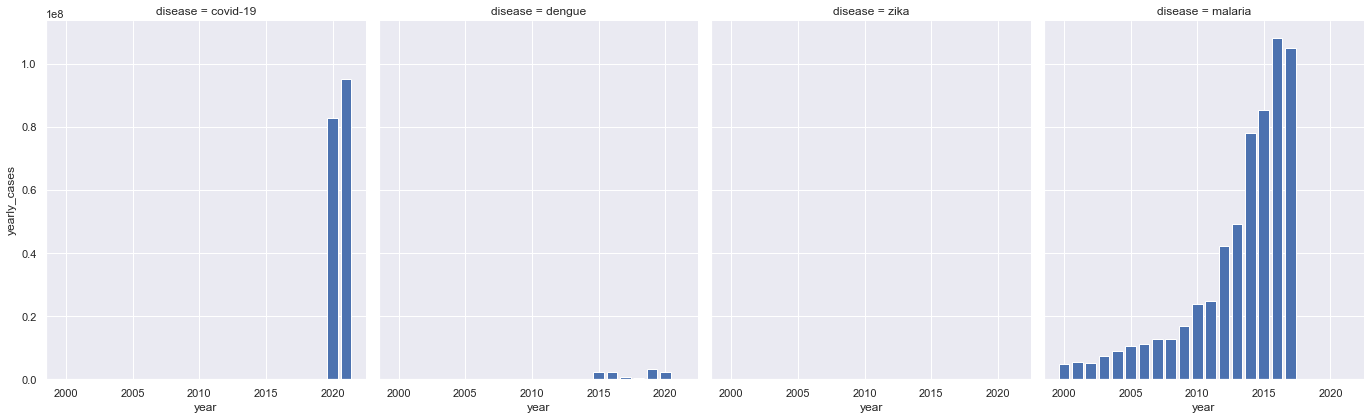

In [11]:
g = sns.FacetGrid(cases_per_year, col='disease', aspect=0.8, height=6)
g.map(plt.bar, 'year','yearly_cases')

<AxesSubplot:xlabel='country'>

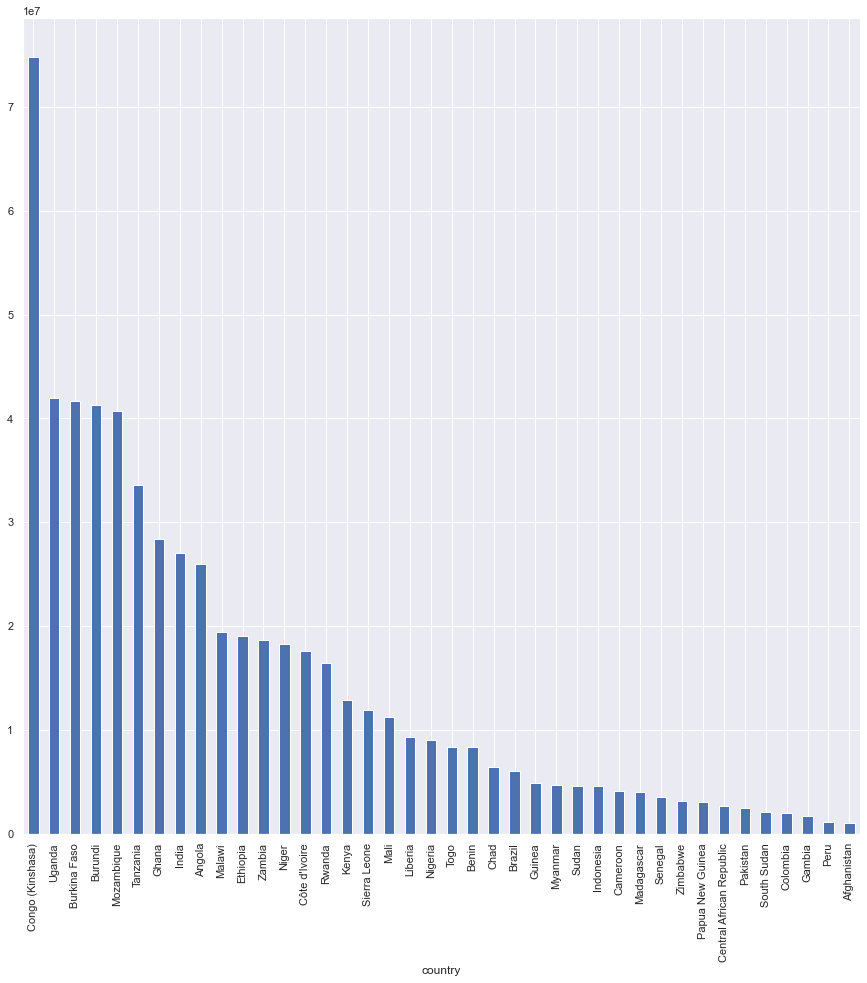

In [12]:
# since the malaria cases are so high and in some years higher than the covid cases globally
# plotting which country has the highest cases - only top 40

malaria[['country','year','cumulative_cases']].groupby('country').cumulative_cases.sum().sort_values(ascending=False).head(40).plot(kind='bar')

In [28]:
covidglobal = px.scatter_geo(covid19, locations="iso_code",
                     size="cumulative_cases" # size of markers, "pop" is one of the columns of gapminder
                     )
covidglobal.show()

In [29]:
malariafig = px.scatter_geo(malaria, locations="iso_code",
                     size="cumulative_cases" # size of markers, "pop" is one of the columns of gapminder
                     )
malariafig.show()

In [30]:
denguefig = px.scatter_geo(dengue, locations="iso_code",
                     size="cumulative_cases" # size of markers, "pop" is one of the columns of gapminder
                     )
denguefig.show()

In [31]:
zikafig = px.scatter_geo(zika, locations="iso_code",
                     size="cumulative_cases" # size of markers, "pop" is one of the columns of gapminder
                     )
zikafig.show()

In [17]:
df2 = px.data.gapminder()
fig = px.scatter_geo(df2, locations="iso_alpha", color="continent",
                     hover_name="country", size="pop",
                     animation_frame="year",
                     projection="natural earth")
fig.show()